## Prepare the data of ratings of Stranger things related to each episode

In [289]:
# Load libries
import pandas as pd
import seaborn as sns
ratings = pd.read_csv('ratings.csv')

# # Calculate the character with the most dialogue in each season
# ratings_mean_std = ratings.groupby('season')['ratings'].agg(['mean', 'std']).reset_index()

# # Merging the mean and standard deviation back with the original ratings data
# ratings_data_standardized = pd.merge(ratings, ratings_mean_std, on='season', how='left')

# # Standardizing the ratings: (rating - mean) / std
# ratings_data_standardized['standardized_ratings'] = (
#     ratings_data_standardized['ratings'] - ratings_data_standardized['mean']
# ) / ratings_data_standardized['std']

# ratings_data_standardized.head()


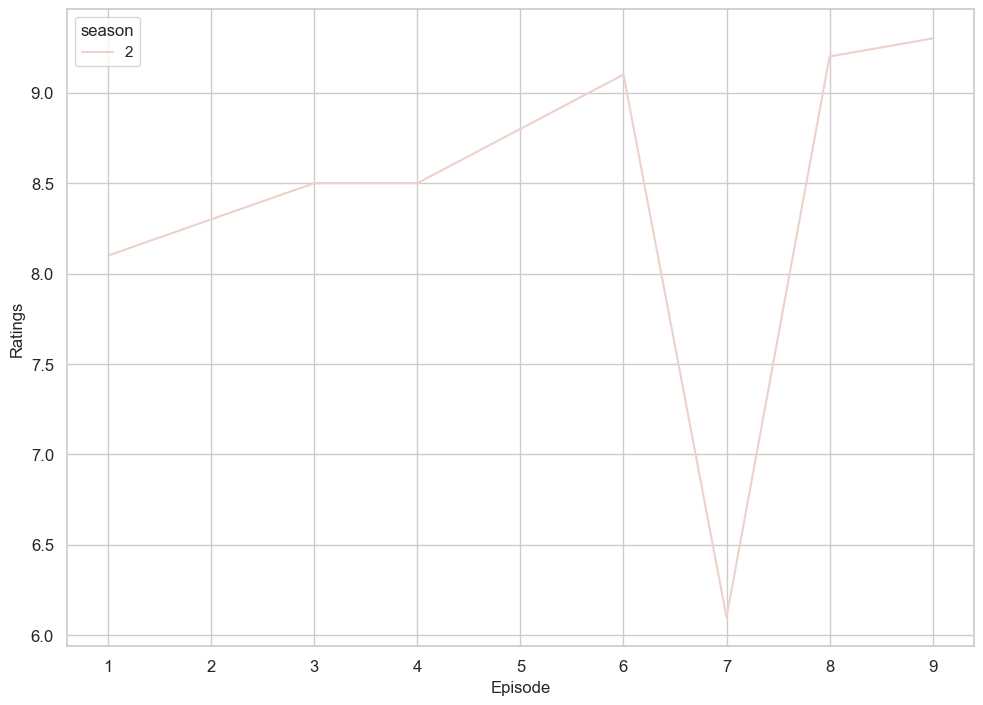

In [290]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.lineplot(x='episode', y='ratings', hue='season', data=ratings[ratings['season'] == 2])
plt.xlabel('Episode')
plt.ylabel('Ratings')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Calculate and visualize the trend of the ratings corresponding to each season

<Axes: xlabel='episode', ylabel='ratings'>

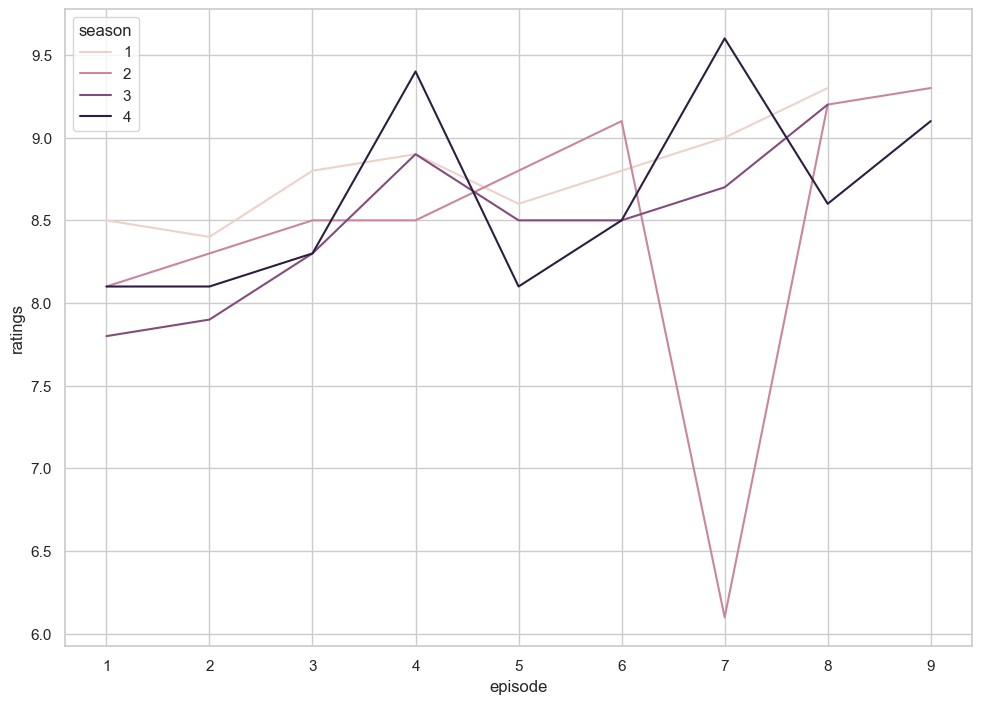

In [291]:
sns.set_style('whitegrid')
sns.lineplot(x='episode', y='ratings', hue='season', data=ratings)

## Calculate the trend of each characters' volume

In [292]:
dialogue_df = pd.read_csv('stranger_things_all_dialogue.csv')
dialogue_df_cleaned = dialogue_df.dropna(subset=['dialogue'])

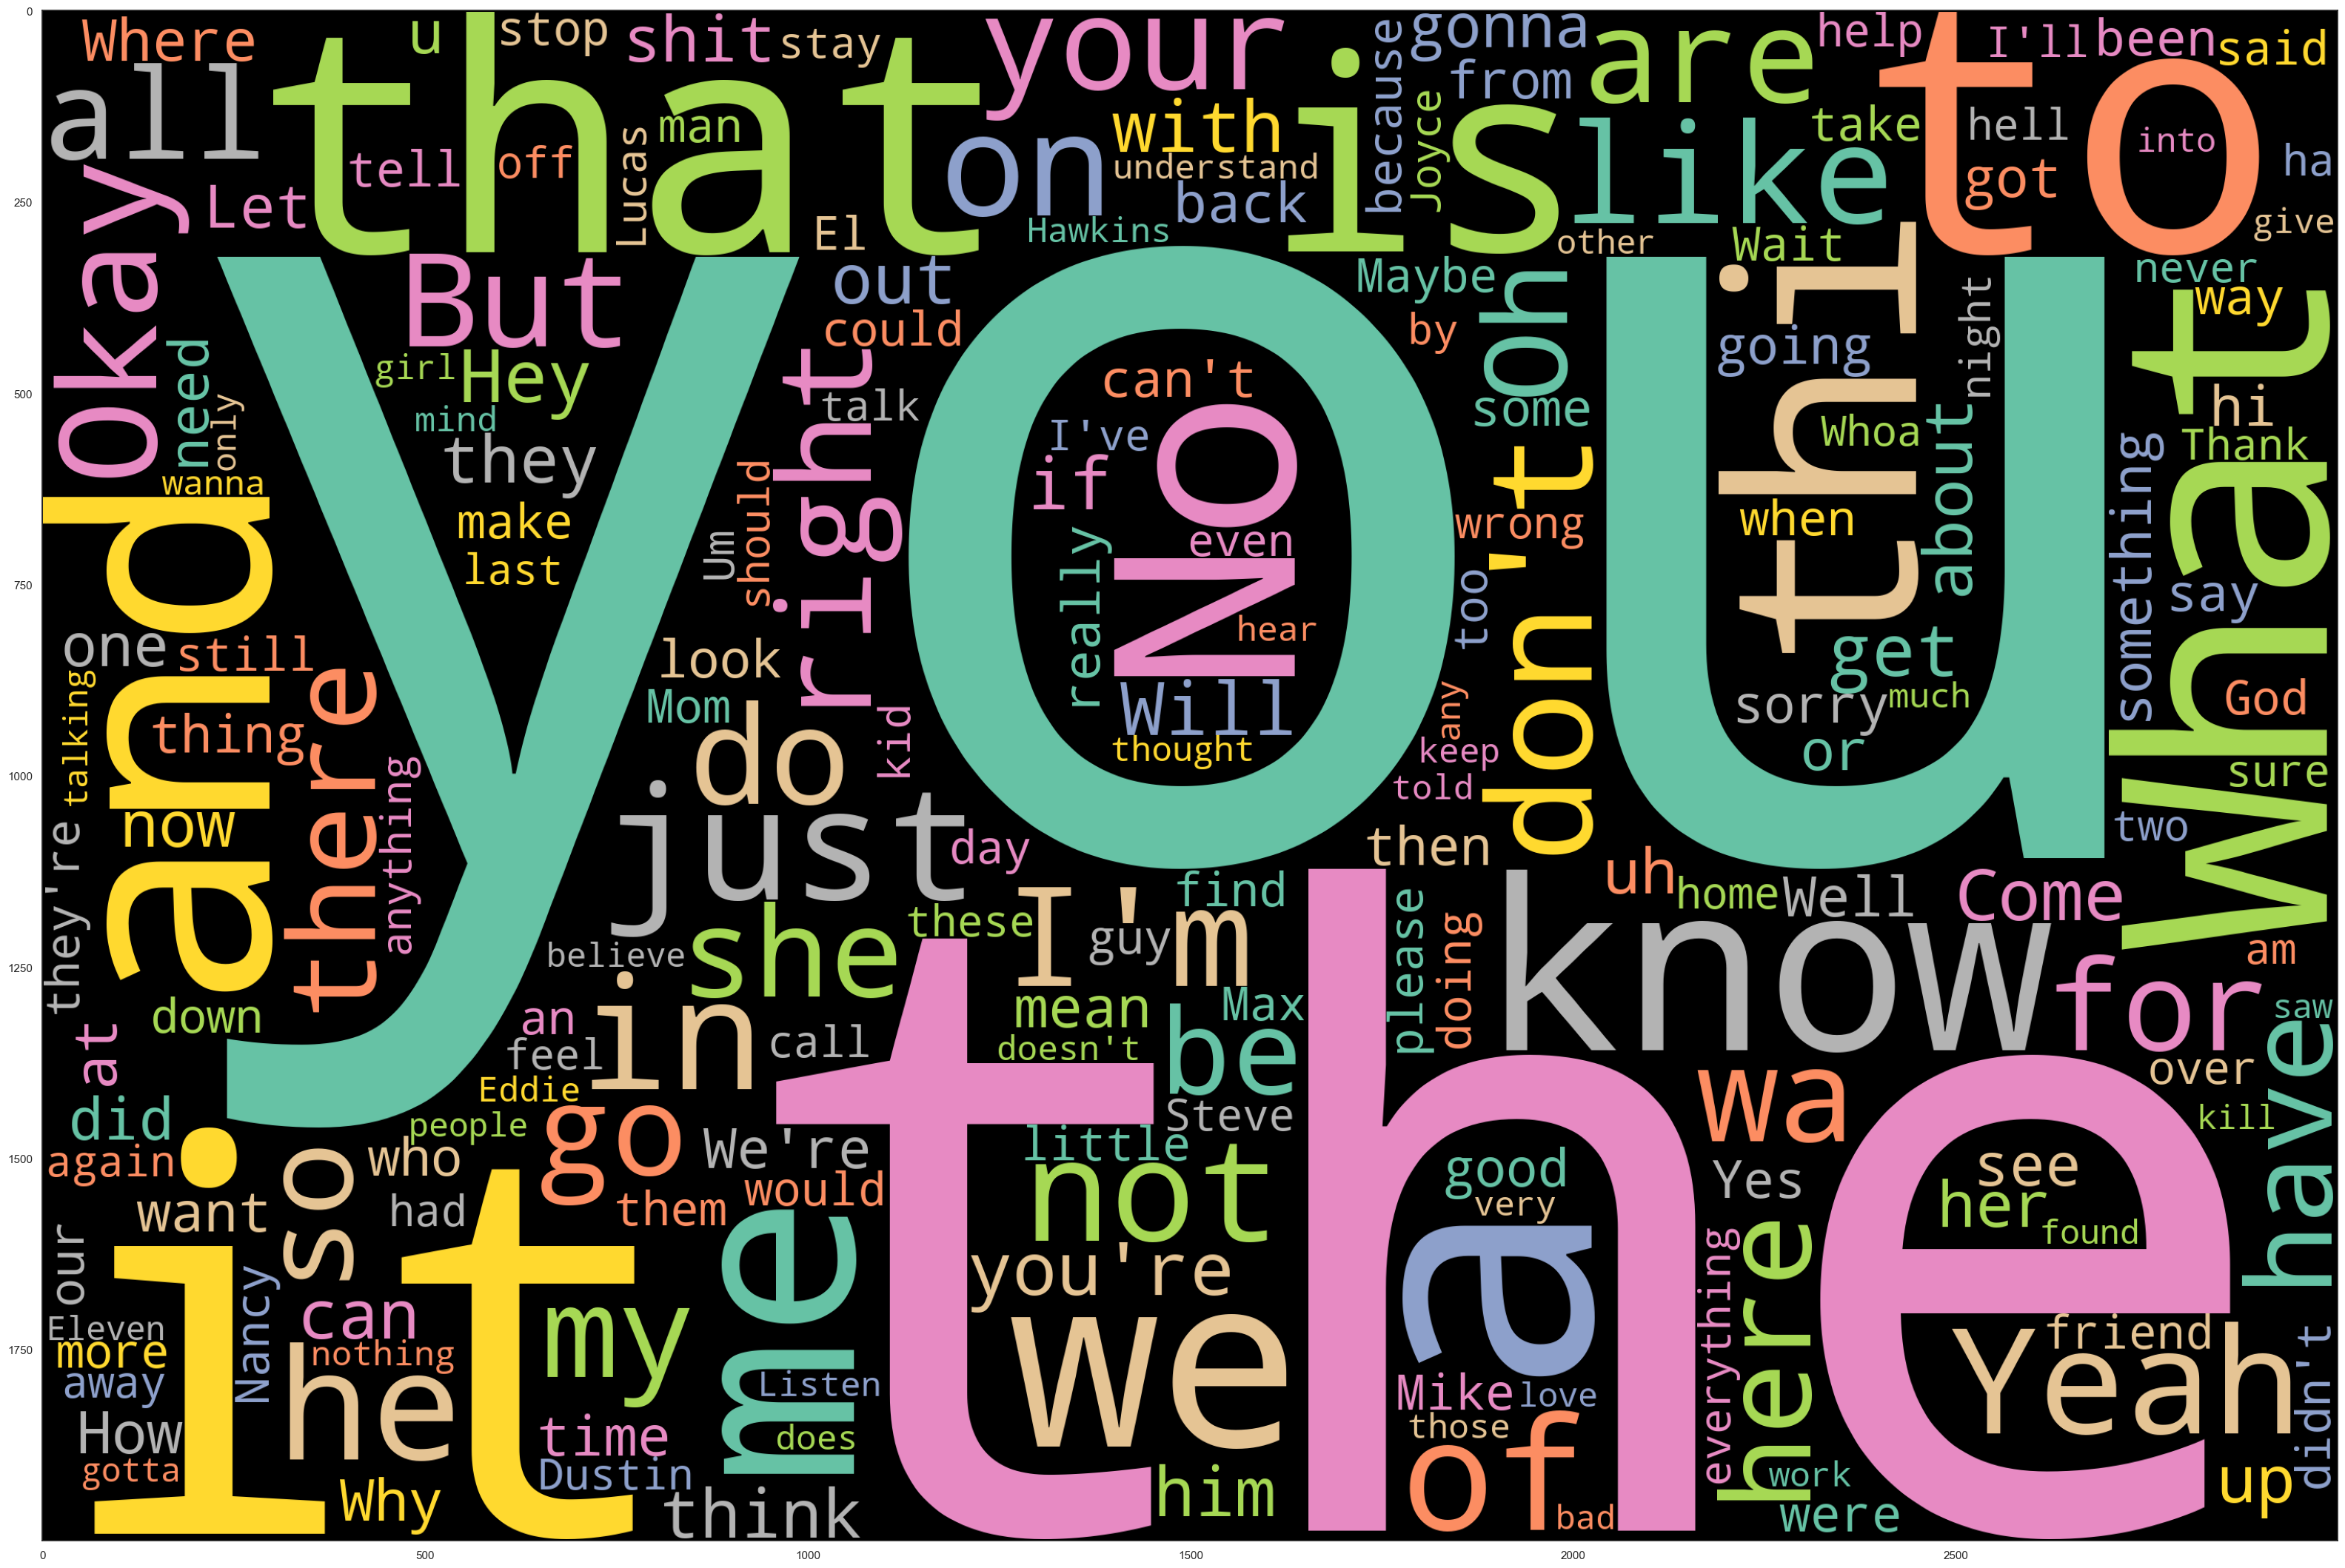

In [315]:
# Generat a word cloud of dialogue from the show
from wordcloud import WordCloud
wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords='english').generate(
    ' '.join(dialogue_df_cleaned['dialogue'].tolist())
)
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)

In [293]:
dialogue_df_cleaned.isna().sum()

season                 0
episode                0
line                   0
raw_text               0
stage_direction    21841
dialogue               0
start_time             0
end_time               0
dtype: int64

In [294]:
dialogue_df_cleaned.loc[:, 'stage_direction'] = dialogue_df_cleaned.loc[:, 'stage_direction'].fillna(method='ffill')

In [295]:
ratings['volumes'] = dialogue_df_cleaned.groupby(['season', 'episode'])['dialogue'].count().values

<Axes: xlabel='season', ylabel='volumes'>

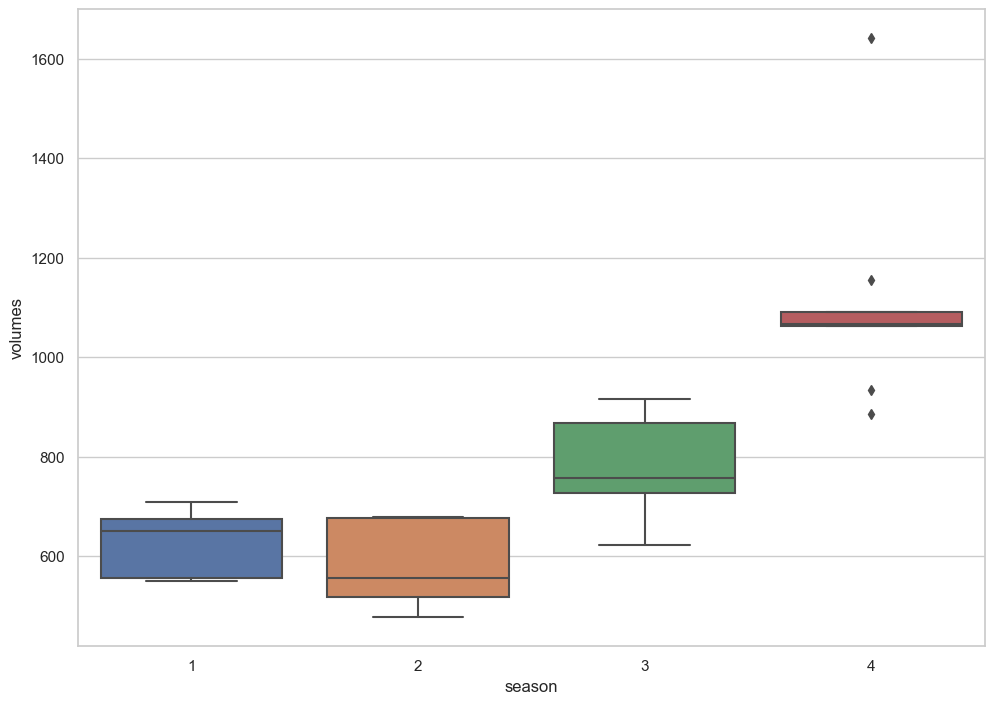

In [296]:
# find the corrlations between ratings and volumes
ratings.corr()

# visulize the correlations between seasons and volumes
sns.set_style('whitegrid')
sns.boxplot(x='season', y='volumes', data=ratings)

<Axes: xlabel='season', ylabel='ratings'>

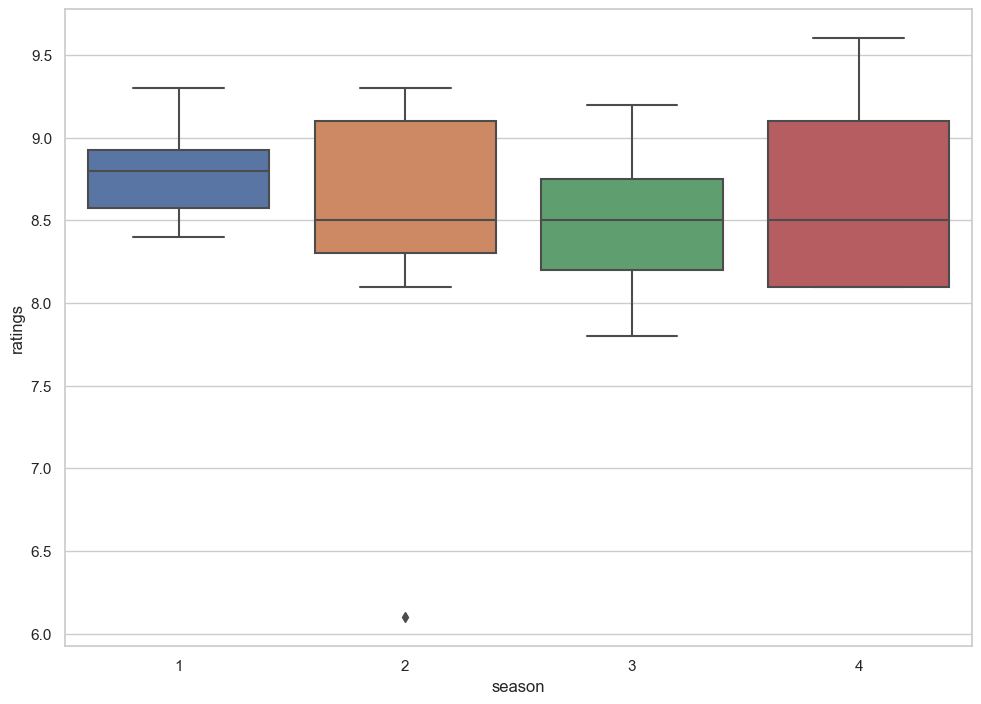

In [297]:
sns.set_style('whitegrid')
sns.boxplot(x='season', y='ratings', data=ratings)

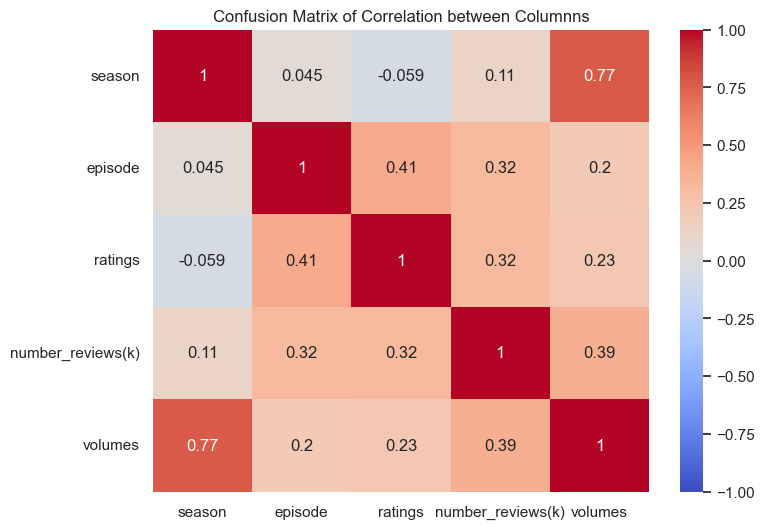

In [298]:
# visulize the correlations matrix between ratings and volumes
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(ratings.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Confusion Matrix of Correlation between Columnns')
plt.show()




In [299]:
str_mike = "[Mike]"
str_mike = str_mike.replace('[', '').replace(']', '')
str_mike

'Mike'

In [300]:
# Define who is the most talkative character in each episode and season, remove all the brackets
dialogue_df_cleaned['character'] = dialogue_df_cleaned['stage_direction'].str.replace('[','').str.replace(']','')



/var/folders/m4/lr92jqdj1_z4cm26h66ndqy40000gn/T/ipykernel_35911/3070843040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dialogue_df_cleaned['character'] = dialogue_df_cleaned['stage_direction'].str.replace('[','').str.replace(']','')


In [301]:
dialogue_df_cleaned.head()

,season,episode,line,raw_text,stage_direction,dialogue,start_time,end_time,character
8,1,1,9,[Mike] Something is coming. Something hungry f...,[Mike],Something is coming. Something hungry for blood.,00:01:44,00:01:48,Mike
9,1,1,10,"A shadow grows on the wall behind you, swallow...",[Mike],"A shadow grows on the wall behind you, swallow...",00:01:48,00:01:52,Mike
10,1,1,11,-It is almost here. -What is it?,[Mike],It is almost here. What is it?,00:01:52,00:01:54,Mike
11,1,1,12,What if it's the Demogorgon?,[Mike],What if it's the Demogorgon?,00:01:54,00:01:56,Mike
12,1,1,13,"Oh, Jesus, we're so screwed if it's the Demogo...",[Mike],"Oh, Jesus, we're so screwed if it's the Demogo...",00:01:56,00:01:59,Mike


In [302]:
dialogue_df_cleaned_with_nosighs_and_chuckles = dialogue_df_cleaned[~dialogue_df_cleaned['character'].str.contains('sighs|chuckles')]

<Axes: ylabel='character'>

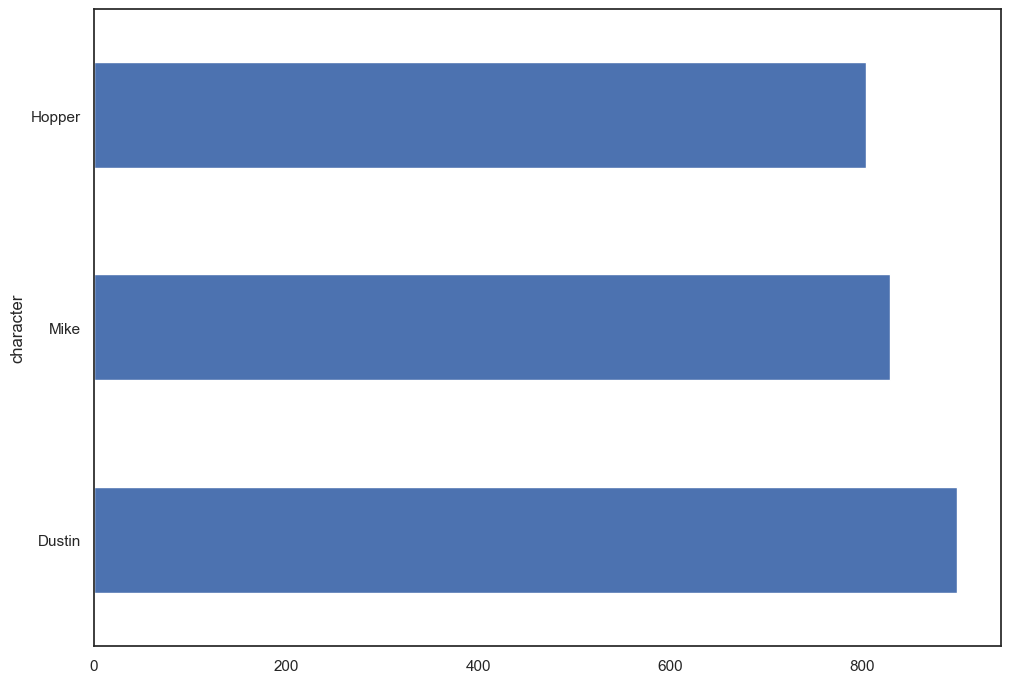

In [303]:
top_10 = dialogue_df_cleaned_with_nosighs_and_chuckles.value_counts('character').sort_values(ascending=False).head(3)
top_10.plot(kind='barh')



In [304]:
dialogue_df.tail()

,season,episode,line,raw_text,stage_direction,dialogue,start_time,end_time
32514,4,9,2218,♪ Spellbound ♪,NaN,♪ Spellbound ♪,02:19:28,02:19:30
32515,4,9,2219,♪ Spellbound ♪,NaN,♪ Spellbound ♪,02:19:30,02:19:31
32516,4,9,2220,[vocalizing],[vocalizing],NaN,02:19:31,02:19:33
32517,4,9,2221,♪ Spellbound ♪,NaN,♪ Spellbound ♪,02:19:33,02:19:35
32518,4,9,2222,[song ends],[song ends],NaN,02:19:39,02:19:39


In [305]:
# calculate the volume of Dustin in each episode, leave 0 if there is no Dustin in the episode
# check if Dustin doesn't appear in the episode
dialogue_df_cleaned.groupby(['season', 'episode'])['character'].apply(lambda x: 'Dustin' not in x.values)
# make the value count for Dustin in each episode, if Dustin doesn't appear in the episode, return 0, append the result to ratings
ratings['dustin_volume'] = dialogue_df_cleaned.groupby(['season', 'episode'])['character'].apply(lambda x: x.value_counts()['Dustin'] if 'Dustin' in x.values else 0).to_frame().reset_index()['character']

<Axes: ylabel='character'>

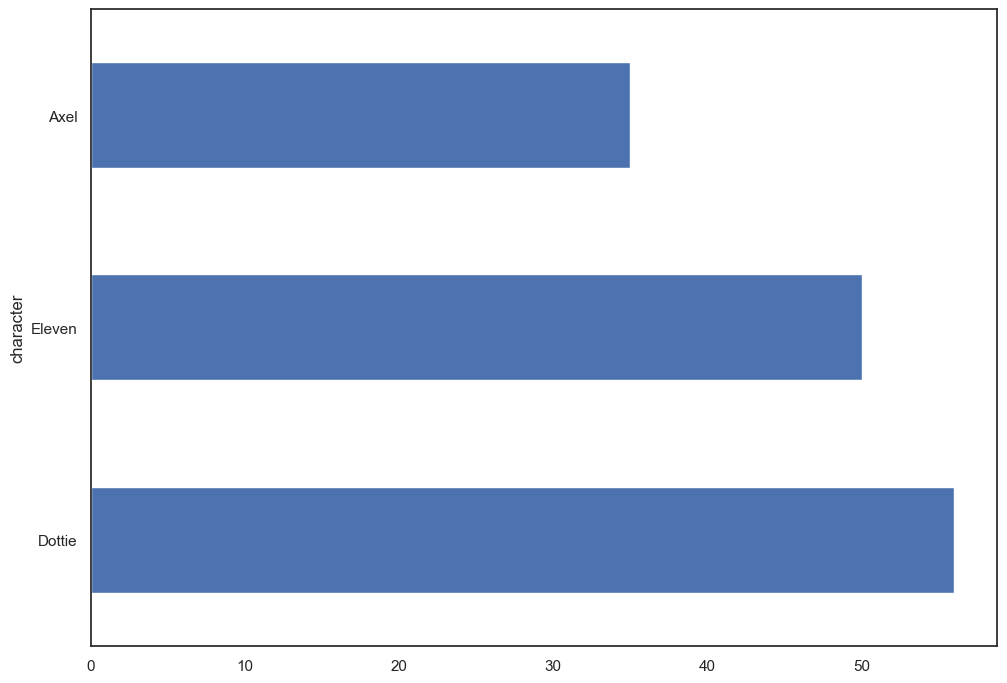

In [306]:
# Who talk the most on seasnon 3 episode 7
season2_episode7 = dialogue_df_cleaned[(dialogue_df_cleaned['season'] == 2) & (dialogue_df_cleaned['episode'] == 7)].value_counts('character').head(3)
season2_episode7.plot(kind='barh')

In [307]:
ratings['mike_volume'] = dialogue_df_cleaned.groupby(['season', 'episode'])['character'].apply(lambda x: x.value_counts()['Mike'] if 'Mike' in x.values else 0).to_frame().reset_index()['character']
ratings['hopper_volume'] = dialogue_df_cleaned.groupby(['season', 'episode'])['character'].apply(lambda x: x.value_counts()['Hopper'] if 'Hopper' in x.values else 0).to_frame().reset_index()['character']


In [308]:
# subset the season 3 data
dialogue_df_cleaned_season2 = dialogue_df_cleaned[dialogue_df_cleaned['season'] == 2]
# subset the season 3 data in the rating dataframe
ratings_season2 = ratings[ratings['season'] == 2]
ratings_season2.drop(columns=['season', 'episode', 'number_reviews(k)', 'volumes'], inplace=True)

/var/folders/m4/lr92jqdj1_z4cm26h66ndqy40000gn/T/ipykernel_35911/2931249945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_season2.drop(columns=['season', 'episode', 'number_reviews(k)', 'volumes'], inplace=True)


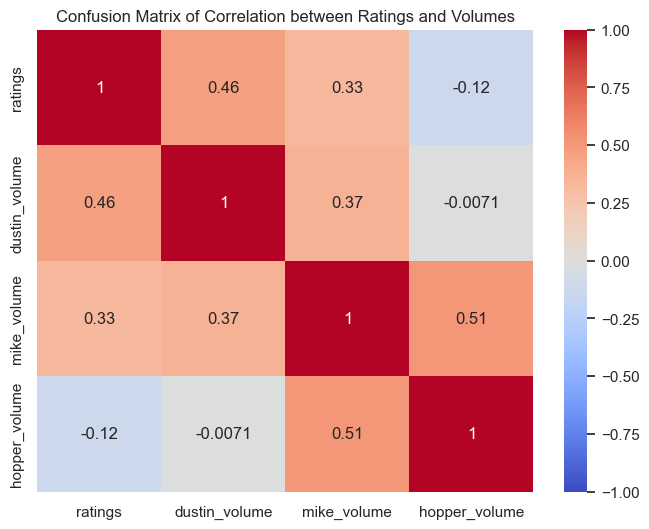

In [309]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(ratings_season2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Confusion Matrix of Correlation between Ratings and Volumes')
plt.show()

ratings['dottie_volume'] = dialogue_df_cleaned.groupby(['season', 'episode'])['character'].apply(lambda x: x.value_counts()['Dottie'] if 'Dottie' in x.values else 0).to_frame().reset_index()['character']
ratings['eleven_volumne'] = dialogue_df_cleaned.groupby(['season', 'episode'])['character'].apply(lambda x: x.value_counts()['Eleven'] if 'Eleven' in x.values else 0).to_frame().reset_index()['character']
ratings['axel_volume'] = dialogue_df_cleaned.groupby(['season', 'episode'])['character'].apply(lambda x: x.value_counts()['Axel'] if 'Axel' in x.values else 0).to_frame().reset_index()['character']

In [310]:
# subset the season 3 data
dialogue_df_cleaned_season2 = dialogue_df_cleaned[dialogue_df_cleaned['season'] == 2]
# subset the season 3 data in the rating dataframe
ratings_season2 = ratings[ratings['season'] == 2]

In [311]:
# drop columns that are not needed
ratings_season2.drop(columns=['season', 'episode', 'number_reviews(k)', 'volumes'], inplace=True)

/var/folders/m4/lr92jqdj1_z4cm26h66ndqy40000gn/T/ipykernel_35911/2529383580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_season2.drop(columns=['season', 'episode', 'number_reviews(k)', 'volumes'], inplace=True)


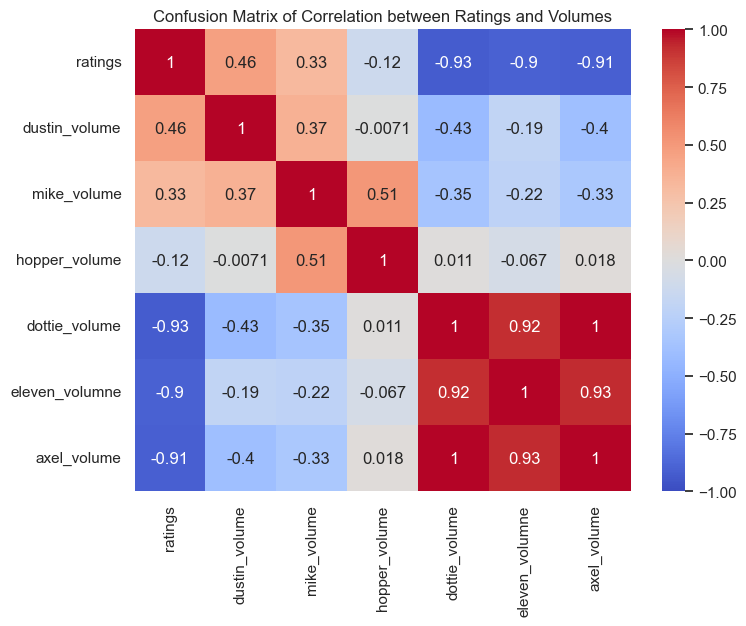

In [312]:
# find the correlations between ratings and dustin_volume, mike_volume, hopper_volume
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(ratings_season2.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Confusion Matrix of Correlation between Ratings and Volumes')
plt.show()

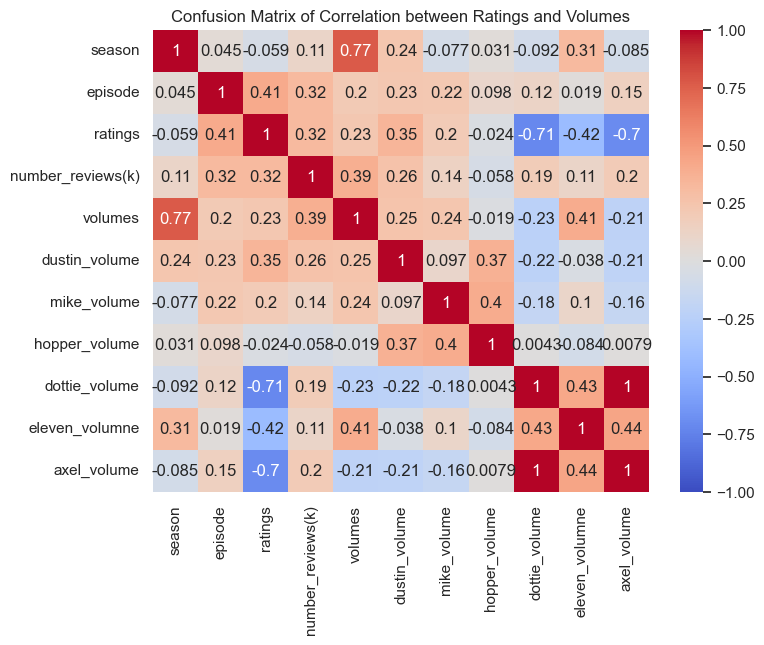

In [313]:
sns.set_style('white')
plt.figure(figsize=(8, 6))
sns.heatmap(ratings.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Confusion Matrix of Correlation between Ratings and Volumes')
plt.show()